In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.datasets import make_swiss_roll

from paper_utils import *
from matplotlib.colors import LinearSegmentedColormap

from ManifoldDiffusionGeometry import *
from Visualise import *

from Other_methods.HickokBlumberg.curvature import scalar_curvature_est as HickokBlumberg
from Other_methods.HickokBlumberg.manifold import Hyperboloid

import plotly.graph_objects as go
import skdim

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from PIL import Image
import io
import matplotlib.cm as cm
import matplotlib.colors as mcolors

Generate sample data

In [3]:
benchmark = skdim.datasets.BenchmarkManifolds(random_state=0, )
benchmark.truth

Intrinsic Dimension Number of variables  \
M1_Sphere                          10                  11   
M2_Affine_3to5                      3                   5   
M3_Nonlinear_4to6                   4                   6   
M4_Nonlinear                        4                   8   
M5a_Helix1d                         1                   3   
M5b_Helix2d                         2                   3   
M6_Nonlinear                        6                  36   
M7_Roll                             2                   3   
M8_Nonlinear                       12                  72   
M9_Affine                          20                  20   
M10a_Cubic                         10                  11   
M10b_Cubic                         17                  18   
M10c_Cubic                         24                  25   
M10d_Cubic                         70                  71   
M11_Moebius                         2                   3   
M12_Norm                           20                  20   
M13a_Scurve                         2                   3   
M13b_Spiral                         1                  13   
Mbeta                              10                  40   
Mn1_Nonlinear                      18                  72   
Mn2_Nonlinear                      24                  96   
Mp1_Paraboloid                      3                  12   
Mp2_Paraboloid                      6                  21   
Mp3_Paraboloid                      9                  30   

                                                         Description  
M1_Sphere                               10D sphere linearly embedded  
M2_Affine_3to5                                          Affine space  
M3_Nonlinear_4to6      Concentrated figure, mistakable with a 3D one  
M4_Nonlinear                                      Nonlinear manifold  
M5a_Helix1d                                                 1D helix  
M5b_Helix2d                                                 2D helix  
M6_Nonlinear                                      Nonlinear manifold  
M7_Roll                                                   Swiss Roll  
M8_Nonlinear                      Nonlinear (highly curved) manifold  
M9_Affine                                               Affine space  
M10a_Cubic                                             10D hypercube  
M10b_Cubic                                             17D hypercube  
M10c_Cubic                                             24D hypercube  
M10d_Cubic                                             70D hypercube  
M11_Moebius                            Möebius band 10-times twisted  
M12_Norm                             Isotropic multivariate Gaussian  
M13a_Scurve                                               2D S-curve  
M13b_Spiral                                           1D helix curve  
Mbeta              Manifold generated with a smooth nonuniform pd...  
Mn1_Nonlinear      Nonlinearly embedded manifold of high ID (see ...  
Mn2_Nonlinear      Nonlinearly embedded manifold of high ID (see ...  
Mp1_Paraboloid     3D paraboloid, nonlinearly embedded in (3(3+1)...  
Mp2_Paraboloid     6D paraboloid, nonlinearly embedded in (3*(6+1...  
Mp3_Paraboloid     9D paraboloid, nonlinearly embedded in (3*(9+1...

### Make pointwise dimension figures

In [4]:
data = benchmark.generate(n = 4000, noise = 0.)['M7_Roll']
pointwise_dimensions = Dimension_Estimate(data)[1]
fig1 = plot_dims_3d(data, pointwise_dimensions, [3,8,2], 0.12)
fig1.show()

In [6]:
data = Hyperboloid.sample(2500)
pointwise_dimensions = Dimension_Estimate(data)[1]
fig2 = plot_dims_3d(data, pointwise_dimensions, [3,8,2], 0.7)
fig2.show()

In [7]:
data = benchmark.generate(n = 6000, noise = 0.)['M11_Moebius']
pointwise_dimensions = Dimension_Estimate(data)[1]
fig3 = plot_dims_3d(data, pointwise_dimensions, [3,8,4], 2.4)
fig3.show()

In [ ]:
data = skdim.datasets.lineDiskBall(2000)[0]
pointwise_dimensions = Dimension_Estimate(data)[1]
fig4 = plot_dims_3d(data[:,[0,2,1]], pointwise_dimensions, [4,-3,2], 0.8)
fig4.show()

Square, line, circle

In [73]:
square = np.random.uniform(-1,0,(6000,2))

theta = np.random.uniform(0,2*np.pi,600)
circle = np.stack((np.cos(theta),np.sin(theta)),axis=1)/2

line_x = np.random.uniform(-1,0.75,600)
line = np.stack((line_x, -0.25 - line_x), axis=1)

data = np.concatenate((square,circle, line))
pointwise_dimensions = Dimension_Estimate(data, n0=80)[1]

fig2d_1 = plot_dims_2d(data, pointwise_dimensions)
fig2d_1.show()

(7200, 3)


Snake

In [74]:
data = np.random.uniform(0.4,4,(50000,2))
data = data[data[:,0]*data[:,1]**1.2 < 1]
data[:,1] += 0.2*np.sin(2*data[:,0]**2)

print(data.shape[0])

pointwise_dimensions = Dimension_Estimate(data, n0=100)[1]

fig2d_2 = plot_dims_2d(data, pointwise_dimensions)
fig2d_2.show()

3940
(3940, 3)


Disks

In [75]:
disk = np.random.uniform(-1,1,(6000,2))
disk = disk[disk[:,0]**2 + disk[:,1]**2 < 1]

data = np.concatenate((disk, 0.3*disk[:400] + [2,0], 0.05*disk[:70] + [1.5,0.5]))

# data[:,1] += 0.2*np.sin(2*data[:,0]**2)

print(data.shape[0])

pointwise_dimensions = Dimension_Estimate(data, n0=100)[1]

fig2d_3 = plot_dims_2d(data, pointwise_dimensions)
fig2d_3.show()

5159
(5159, 3)


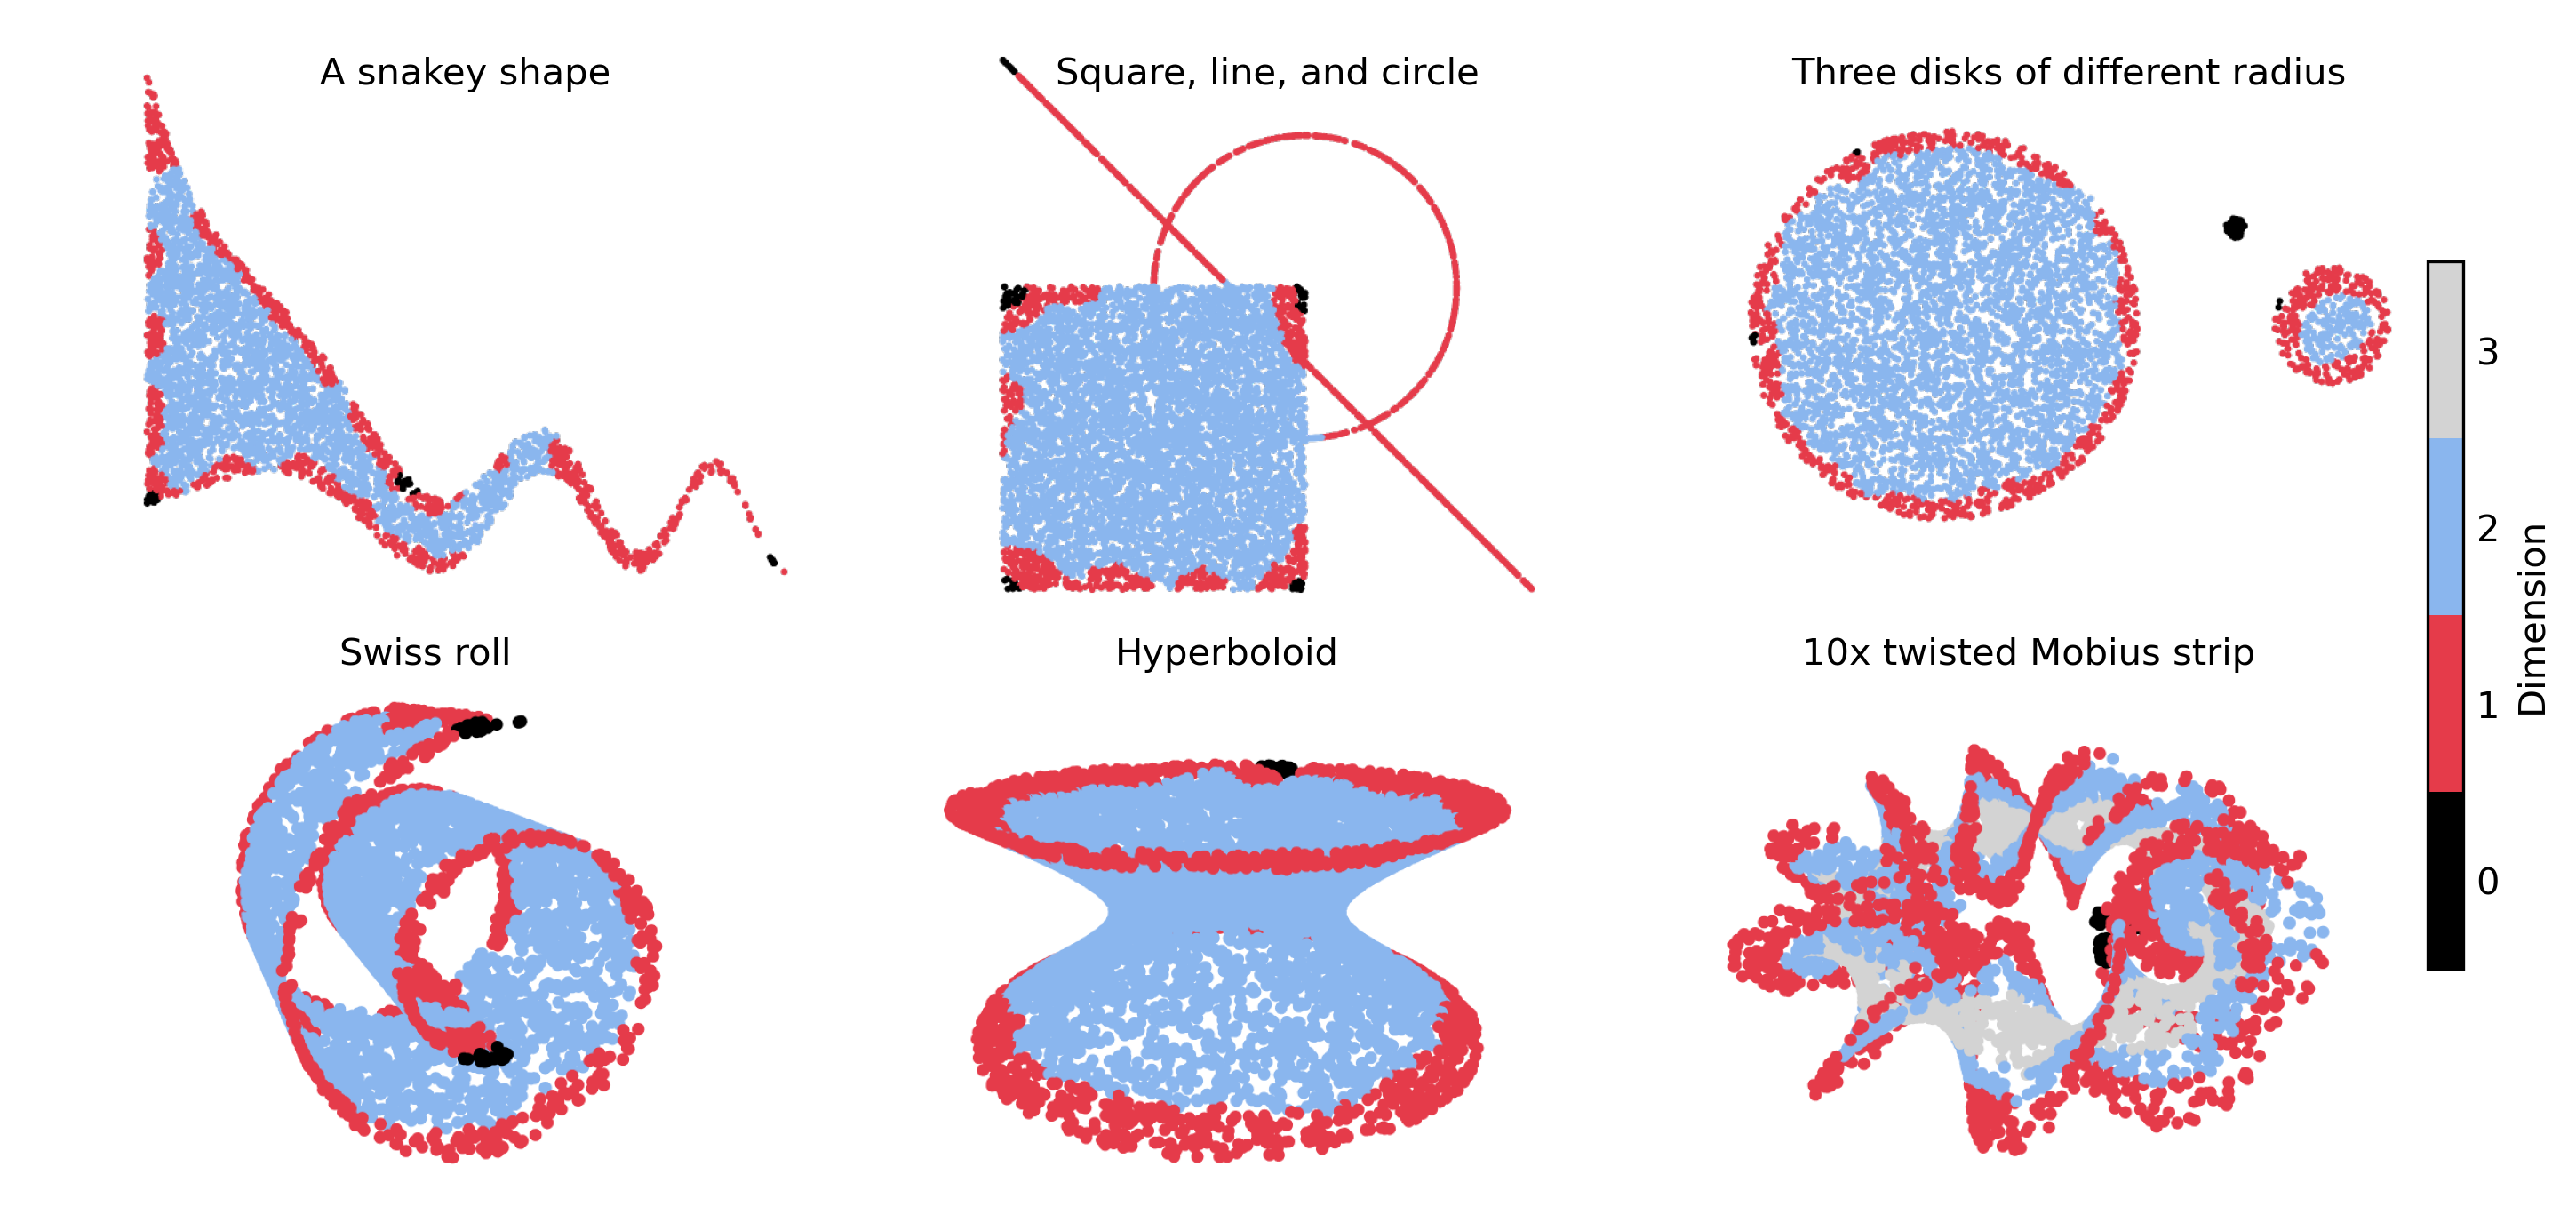

In [76]:
fig, ax = plt.subplots(2,3, 
                       figsize = (15,5),
                       dpi = 300)

ax[0,0].imshow(fig_array(fig2d_2))
ax[0,0].text(0.5, 0.95, 
             'A snakey shape', 
             fontsize = 10,
              ha='center', va='top', transform=ax[0,0].transAxes)

ax[0,1].imshow(fig_array(fig2d_1))
ax[0,1].text(0.5, 0.95, 
             'Square, line, and circle', 
             fontsize = 10,
              ha='center', va='top', transform=ax[0,1].transAxes)

ax[0,2].imshow(fig_array(fig2d_3))
ax[0,2].text(0.5, 0.95, 
             'Three disks of different radius', 
             fontsize = 10,
              ha='center', va='top', transform=ax[0,2].transAxes)

ax[1,0].imshow(fig_array(fig1))
ax[1,0].text(0.5, 0.95, 
             'Swiss roll', 
             fontsize = 10,
              ha='center', va='top', transform=ax[1,0].transAxes)
ax[1,1].imshow(fig_array(fig2))
ax[1,1].text(0.5, 0.95, 
             'Hyperboloid', 
             fontsize = 10,
              ha='center', va='top', transform=ax[1,1].transAxes)
ax[1,2].imshow(fig_array(fig3))
ax[1,2].text(0.5, 0.95, 
             '10x twisted Mobius strip', 
             fontsize = 10,
              ha='center', va='top', transform=ax[1,2].transAxes)
fig.tight_layout(w_pad = -30, h_pad = -2.5)
for aa in ax:
    for a in aa:
        a.axis('off')

# Define a color scale manually
cmap = mcolors.ListedColormap(["black", "#e53b4a", "#8ab6ee", "#d3d3d3"])
norm = mcolors.Normalize(vmin=-0.5, vmax=3.5)  # Manually set range for the colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.08, pad=0, shrink = 0.6,
                    label = 'Dimension',
                    ticks = [0,1,2,3])
cbar.ax.tick_params(size=0)

### Global dimension testing

In [3]:
benchmark = skdim.datasets.BenchmarkManifolds()
truth = benchmark.truth
skdim_benchmark_keys = list(truth[truth['Intrinsic Dimension'] <= 3].index[:-1])
extra_keys = ['circle', '2_sphere', '3_sphere', '2_torus', '3_torus', 'hyperboloid']

keys = skdim_benchmark_keys + extra_keys

skdim_benchmark_dims = list(truth ['Intrinsic Dimension'][skdim_benchmark_keys])
extra_dims = [1,2,3,2,3,2]
dims = dict(zip(keys, skdim_benchmark_dims + extra_dims))

def generate_hypersphere(dim, n):
    data = np.random.randn(n, dim+1)
    data /= np.linalg.norm(data, axis=1).reshape(-1,1)
    return data

def generate_hypertorus(dim, n):
    angles = np.random.uniform(0,2*np.pi, size=(n,dim))
    data = np.concatenate((np.cos(angles), np.sin(angles)), axis=1)
    return data

# Define a generation function without noise or rescaling.

def generate_clean(key, n):

    if key in skdim_benchmark_keys:
        return benchmark.generate(n = n)[key]
    
    if key == 'hyperboloid':
        return Hyperboloid.sample(n)[:n]
    
    if key == 'circle':
        return generate_hypersphere(1, n)
    
    if key == '2_sphere':
        return generate_hypersphere(2, n)
    
    if key == '3_sphere':
        return generate_hypersphere(3, n)
    
    if key == '2_torus':
        return generate_hypertorus(2, n)
    
    if key == '3_torus':
        return generate_hypertorus(3, n)

# Compute the average nearest neighbour distance, so that the data can be rescaled
# to uniformise the effect of noise.

scale_factors = {}
for key in keys:
    data = generate_clean(key, 10000)
    scale_factors[key] = data.std()
print(scale_factors)

# Define the final generation function with noise.

def generate(key, n, sigma = 0):

    data = generate_clean(key, n)
    data /= scale_factors[key]
    data += sigma * np.random.randn(n, data.shape[1])

    return data
    

{'M2_Affine_3to5': 3.9678133208089674, 'M5a_Helix1d': 1.294066283912104, 'M5b_Helix2d': 11.412176669900829, 'M7_Roll': 7.931357169640759, 'M11_Moebius': 0.6016172684526513, 'M13a_Scurve': 1.070382700657167, 'M13b_Spiral': 28.1663553613587, 'circle': 0.7070957338391202, '2_sphere': 0.5773471892544404, '3_sphere': 0.49999564566791493, '2_torus': 0.7071017453264502, '3_torus': 0.7071067444401866, 'hyperboloid': 2.1045877980840175}


In [ ]:
for key in keys:
    data = generate(key, 1000, 0.1)
    if data.shape[1] == 2:
        print(key)
        px.scatter(x=data[:, 0], y=data[:, 1]).show()
    if data.shape[1] >= 3:
        print(key)
        px.scatter_3d(x=data[:, 0], y=data[:, 1], z=data[:, 2]).show()

In [5]:
methods = ['Diffusion_Geometry',
           'CorrInt', 'DANCo', 
        #    'ESS', takes too long
           'FisherS', 'KNN', 'lPCA', 'MADA', 'MiND_ML', 'MLE', 'MOM', 'TLE', 'TwoNN']

def Dimension_Method(key, data):
    if key == 'Diffusion_Geometry':
        return Dimension_Estimate(data)[0]
    if key == 'CorrInt':
        return skdim.id.CorrInt().fit(data).dimension_.round()
    if key == 'DANCo':
        return skdim.id.DANCo().fit(data).dimension_.round()
    if key == 'ESS':
        return skdim.id.ESS().fit(data).dimension_.round()
    if key == 'FisherS':
        return skdim.id.FisherS().fit(data).dimension_.round()
    if key == 'KNN':
        return skdim.id.KNN().fit(data).dimension_.round()
    if key == 'lPCA':
        return skdim.id.lPCA().fit(data).dimension_.round()
    if key == 'MADA':
        return skdim.id.MADA().fit(data).dimension_.round()
    if key == 'MiND_ML':
        return skdim.id.MiND_ML().fit(data).dimension_.round()
    if key == 'MLE':
        return skdim.id.MLE().fit(data).dimension_.round()
    if key == 'MOM':
        return skdim.id.MOM().fit(data).dimension_.round()
    if key == 'TLE':
        return skdim.id.TLE().fit(data).dimension_.round()
    if key == 'TwoNN':
        return skdim.id.TwoNN().fit(data).dimension_.round()

In [6]:
keys

['M2_Affine_3to5',
 'M5a_Helix1d',
 'M5b_Helix2d',
 'M7_Roll',
 'M11_Moebius',
 'M13a_Scurve',
 'M13b_Spiral',
 'circle',
 '2_sphere',
 '3_sphere',
 '2_torus',
 '3_torus',
 'hyperboloid']

In [117]:
sigma_maxs = []

for key in keys:
    print('\n', key)
    dim = dims[key]
    if dim == 1:
        n = 1200
    if dim == 2:
        n = 2400
    if dim == 3:
        n = 4800
    
    methods_key = methods
    prev = 0
    for sigma in [0.02, 0.04, 0.07, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.3, 0.5, 0.75, 1, 1.5, 2, 3]:
        accuracies = dict(zip(methods_key, [[] for _ in methods_key]))
        for _ in range(6):
            data = generate(key, n, sigma)
            for method in methods_key:
                est = Dimension_Method(method, data)
                accuracies[method].append(est == dim)
        avg_acc = np.array([np.mean(accuracies[method]) for method in methods_key])

        # Remove the methods that scored below 50% accuracy on the last run.
        methods_key = np.array(methods_key)[np.where(avg_acc > 0.5)[0]].tolist()
        print(sigma, list(zip(methods_key, avg_acc[np.where(avg_acc > 0.5)[0]].round(2))))

        # If all methods scored 0% accuracy on the last run, break the loop and save the last sigma.
        if len(methods_key) == 0:
            sigma_maxs.append(prev)
            print('no method above 50% - breaking loop and saving sigma =', prev)
            break
        prev = sigma

sigmas = dict(zip(keys, sigma_maxs))


 M2_Affine_3to5
0.02 [('CorrInt', 1.0), ('FisherS', 1.0), ('lPCA', 1.0), ('MADA', 1.0), ('MLE', 1.0), ('MOM', 1.0)]
0.04 [('FisherS', 1.0), ('lPCA', 1.0), ('MOM', 1.0)]
0.07 [('FisherS', 1.0), ('lPCA', 1.0)]
0.1 [('FisherS', 1.0), ('lPCA', 1.0)]
0.125 [('FisherS', 1.0), ('lPCA', 1.0)]
0.15 [('FisherS', 1.0)]
0.175 [('FisherS', 1.0)]
0.2 []
no method above 50% - breaking loop and saving sigma = 0.175

 M5a_Helix1d
0.02 [('Diffusion_Geometry', 1.0), ('CorrInt', 1.0), ('MADA', 1.0), ('MLE', 1.0), ('TLE', 1.0)]
0.04 [('Diffusion_Geometry', 1.0), ('CorrInt', 1.0), ('MADA', 1.0), ('MLE', 1.0)]
0.07 [('Diffusion_Geometry', 1.0), ('CorrInt', 1.0)]
0.1 [('Diffusion_Geometry', 1.0)]
0.125 [('Diffusion_Geometry', 1.0)]
0.15 [('Diffusion_Geometry', 1.0)]
0.175 [('Diffusion_Geometry', 1.0)]
0.2 [('Diffusion_Geometry', 0.83)]
0.225 []
no method above 50% - breaking loop and saving sigma = 0.2

 M5b_Helix2d
0.02 [('TwoNN', 1.0)]
0.04 []
no method above 50% - breaking loop and saving sigma = 0.02

 M

M13b_Spiral only got a positive score from KNN, which is basically random, so we exclude it.

In [120]:
sigmas['M13b_Spiral'] = 0
sigmas

{'M2_Affine_3to5': 0.175,
 'M5a_Helix1d': 0.2,
 'M5b_Helix2d': 0.02,
 'M7_Roll': 0.175,
 'M11_Moebius': 0.175,
 'M13a_Scurve': 0.2,
 'M13b_Spiral': 0,
 'circle': 0.1,
 '2_sphere': 0.225,
 '3_sphere': 0.225,
 '2_torus': 0.25,
 '3_torus': 0.125,
 'hyperboloid': 0.225}

In [121]:
keys_good = [key for key, sigma in sigmas.items() if sigma > 0]
dims_good = [dim for key, dim in dims.items() if key in keys_good]
keys_good

['M2_Affine_3to5',
 'M5a_Helix1d',
 'M5b_Helix2d',
 'M7_Roll',
 'M11_Moebius',
 'M13a_Scurve',
 'circle',
 '2_sphere',
 '3_sphere',
 '2_torus',
 '3_torus',
 'hyperboloid']

In [122]:
scores = []

for key in keys_good:
    print(key)

    dim = dims[key]
    if dim == 1:
        n_low = 600
        n_high = 1200
    if dim == 2:
        n_low = 1200
        n_high = 2400
    if dim == 3:
        n_low = 2400
        n_high = 4800

    sigma = sigmas[key]
    print(dim, sigma)
    n_scores = []
    for n in [n_low, n_high]:
        s_scores = []
        for s in [0, 0.5*sigma, sigma]:
            accuracies = dict(zip(methods, [[] for _ in methods]))
            for _ in range(20):
                data = generate(key, n, s)
                for method in methods:
                    est = Dimension_Method(method, data)
                    accuracies[method].append(est == dim)
            avg_acc_stds = [(np.mean(accuracies[method]), np.std(accuracies[method])) for method in methods]

            avg_acc = np.array([np.mean(accuracies[method]) for method in methods])
            non_zero_indices = np.where(avg_acc > 0)[0]
            print(n, s, list(zip(np.array(methods)[non_zero_indices], avg_acc[non_zero_indices].round(1))))
            
            s_scores.append(avg_acc_stds)
        n_scores.append(s_scores)
    scores.append(n_scores)

scores = np.array(scores)

M2_Affine_3to5
3 0.175
2400 0 [('Diffusion_Geometry', 0.7), ('CorrInt', 1.0), ('DANCo', 1.0), ('FisherS', 1.0), ('KNN', 0.2), ('lPCA', 1.0), ('MADA', 1.0), ('MiND_ML', 1.0), ('MLE', 1.0), ('MOM', 1.0), ('TLE', 1.0), ('TwoNN', 1.0)]
2400 0.0875 [('FisherS', 1.0), ('KNN', 0.0), ('lPCA', 1.0)]
2400 0.175 [('FisherS', 1.0), ('KNN', 0.2)]
4800 0 [('Diffusion_Geometry', 0.8), ('CorrInt', 1.0), ('DANCo', 1.0), ('FisherS', 1.0), ('KNN', 0.0), ('lPCA', 1.0), ('MADA', 1.0), ('MiND_ML', 1.0), ('MLE', 1.0), ('MOM', 1.0), ('TLE', 1.0), ('TwoNN', 1.0)]
4800 0.0875 [('FisherS', 1.0), ('KNN', 0.2), ('lPCA', 1.0)]
4800 0.175 [('FisherS', 1.0), ('KNN', 0.2)]
M5a_Helix1d
1 0.2
600 0 [('Diffusion_Geometry', 1.0), ('CorrInt', 1.0), ('DANCo', 1.0), ('KNN', 0.2), ('MADA', 1.0), ('MiND_ML', 1.0), ('MLE', 1.0), ('TLE', 1.0), ('TwoNN', 1.0)]
600 0.1 [('Diffusion_Geometry', 1.0), ('CorrInt', 0.6), ('KNN', 0.4)]
600 0.2 [('Diffusion_Geometry', 0.4), ('KNN', 0.5)]
1200 0 [('Diffusion_Geometry', 1.0), ('CorrInt', 1

[[ 89.2  83.3  53.3  90.   80.4  60.4]
 [100.   86.2  21.2  91.7  37.5   3.3]
 [ 91.7   0.    0.   97.5   0.4   0. ]
 [ 16.7  16.7  14.2  16.7  16.7  15. ]
 [ 32.5  27.9  32.5  27.9  30.8  31.7]
 [  8.3   8.3   0.    8.3   8.3   0. ]
 [ 91.7  32.1   0.   91.7   8.3   0. ]
 [ 91.7  19.2   0.  100.   17.5   1.2]
 [ 91.7  48.3   0.   91.7  16.7   0. ]
 [ 75.   66.7  50.   83.3  73.3  19.2]
 [ 91.7   0.    0.   91.7   0.    0. ]
 [100.   10.4   7.9 100.    8.3   8.3]]
[[31.1 37.3 49.9 30.  39.7 48.9]
 [ 0.  34.4 40.9 27.6 48.4 18. ]
 [27.6  0.   0.  15.6  6.4  0. ]
 [37.3 37.3 34.9 37.3 37.3 35.7]
 [46.8 44.9 46.8 44.9 46.2 46.5]
 [27.6 27.6  0.  27.6 27.6  0. ]
 [27.6 46.7  0.  27.6 27.6  0. ]
 [27.6 39.4  0.   0.  38.  11.1]
 [27.6 50.   0.  27.6 37.3  0. ]
 [43.3 47.1 50.  37.3 44.2 39.4]
 [27.6  0.   0.  27.6  0.   0. ]
 [ 0.  30.5 27.   0.  27.6 27.6]]


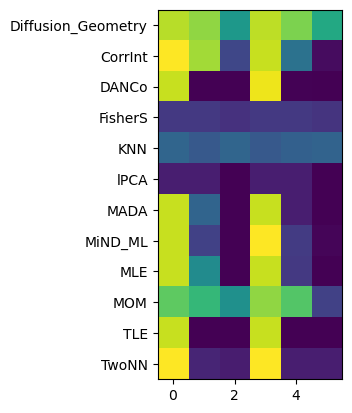

In [134]:
avg_scores = scores.mean(axis = 0)
avg_acc = avg_scores[:,:,:,0]
avg_variances = np.mean(scores[:,:,:,:,0]**2 + scores[:,:,:,:,1]**2, axis=0) - avg_acc**2
avg_std = np.sqrt(avg_variances)

print(100*avg_acc.reshape(6,-1).T.round(3))
print(100*avg_std.reshape(6,-1).T.round(3))
plt.imshow(avg_acc.reshape(6,-1).T)
plt.yticks(ticks=np.arange(12), labels=methods)
plt.show()

Print latex results for the table.

In [125]:
accuracies = 100*avg_acc.reshape(6,-1).T
std_devs = 100*avg_std.reshape(6,-1).T

for i in range(12):
    row_elements = []
    for j in range(6):
        # Create the string in the form mean ± std_dev
        element = f"${accuracies[i, j]:.1f}\\pm{std_devs[i, j]:.1f}$"
        row_elements.append(element)
    
    # Join the row elements with '&' and add '\\\\' at the end of the row
    latex_row = " & ".join(row_elements) + " \\\\"
    print(methods[i])
    print(latex_row)

Diffusion_Geometry
$89.2\pm3.8$ & $83.3\pm0.0$ & $53.3\pm4.1$ & $90.0\pm3.3$ & $80.4\pm4.0$ & $60.4\pm10.3$ \\
CorrInt
$100.0\pm0.0$ & $86.2\pm8.9$ & $21.2\pm4.1$ & $91.7\pm0.0$ & $37.5\pm10.1$ & $3.3\pm4.1$ \\
DANCo
$91.7\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $97.5\pm3.8$ & $0.4\pm1.8$ & $0.0\pm0.0$ \\
FisherS
$16.7\pm0.0$ & $16.7\pm0.0$ & $14.2\pm3.8$ & $16.7\pm0.0$ & $16.7\pm0.0$ & $15.0\pm3.3$ \\
KNN
$32.5\pm43.6$ & $27.9\pm41.2$ & $32.5\pm45.3$ & $27.9\pm42.5$ & $30.8\pm44.2$ & $31.7\pm43.2$ \\
lPCA
$8.3\pm0.0$ & $8.3\pm0.0$ & $0.0\pm0.0$ & $8.3\pm0.0$ & $8.3\pm0.0$ & $0.0\pm0.0$ \\
MADA
$91.7\pm0.0$ & $32.1\pm11.1$ & $0.0\pm0.0$ & $91.7\pm0.0$ & $8.3\pm0.0$ & $0.0\pm0.0$ \\
MiND_ML
$91.7\pm0.0$ & $19.2\pm5.4$ & $0.0\pm0.0$ & $100.0\pm0.0$ & $17.5\pm2.5$ & $1.2\pm3.0$ \\
MLE
$91.7\pm0.0$ & $48.3\pm9.5$ & $0.0\pm0.0$ & $91.7\pm0.0$ & $16.7\pm0.0$ & $0.0\pm0.0$ \\
MOM
$75.0\pm0.0$ & $66.7\pm0.0$ & $50.0\pm0.0$ & $83.3\pm0.0$ & $73.3\pm3.3$ & $19.2\pm5.8$ \\
TLE
$91.7\pm0.0$ & $0.0\pm